In [40]:
import numpy as np
import math
from datetime import datetime

## Question 1

### a) What time (clock) did the sun set that day? [h]

In [41]:
month = 10
day = 15
hour = 17
minute = 6
time_zone = 2
tz_meridian = -15*time_zone
latitude = -34
longitude = -18

In [42]:
date = datetime(2025,month,day)
day_of_year = int(date.strftime("%j"))
print("The day of the year is: ",day_of_year)

The day of the year is:  288


In [43]:
n = day_of_year

#Declination angle
delta = np.arcsin(0.39795*np.cos(2*np.pi*(n-173)/365))
print("Declination angle = ", round(np.rad2deg(delta), 4))

Declination angle =  -9.1026


In [44]:
phi = np.deg2rad(latitude)

#Zenith angle at sunset
theta_0 = np.deg2rad(90)

cos_omega_0 = (np.cos(theta_0)-np.sin(phi)*np.sin(delta))/(np.cos(phi)*np.cos(delta))

omega_0 = np.arccos(cos_omega_0)

t_s0 = omega_0*12/np.pi+12

print("Solar time at sunset is ", round(t_s0,4))


Solar time at sunset is  18.4136


In [45]:
# Convert to hours and minutes
hours = int(t_s0)
minutes = int((t_s0 - hours) * 60)

print(f"Solar clock at sunset is {hours}:{minutes}")

Solar clock at sunset is 18:24


In [46]:
A = 0.258
B = -7.416
C = -3.648
D = -9.228
n = day_of_year


t_EOT = A*np.cos(2*np.pi*(n-1)/365) + B*np.sin(2*np.pi*(n-1)/365) + C*np.cos(4*np.pi*(n-1)/365) + D*np.sin(4*np.pi*(n-1)/365)

print(round(t_EOT,4))

14.6223


In [47]:
t_DST = 0

t_clk = t_s0 - ((tz_meridian-longitude)/15 + t_EOT/60 + t_DST)

print("Local solar clock time at sunset is ", round(t_clk,4))

Local solar clock time at sunset is  18.9699


In [48]:
# Convert to hours and minutes
hours_clk = int(t_clk)
minutes_clk = int((t_clk - hours_clk) * 60)

print(f"Solar clock at sunset is {hours_clk}:{minutes_clk}")

Solar clock at sunset is 18:58


### b) Which was the optimum surface azimuth angle to minimize the surface cosine effectiveness at that time (defined just after the figure) if the surface tilt angle is greater than 0 degrees? [°] (provide a value -180°<γc<180°)

In [49]:
clock_time = hour + minute/60

print("Clock time is ",clock_time)

Clock time is  17.1


In [50]:
t_s = clock_time + (tz_meridian-longitude)/15 + t_EOT/60 + t_DST

print(f"Solar time at {hour}:{minute} (h) = {round(t_s,4)}")

Solar time at 17:6 (h) = 16.5437


In [51]:
#Hour angle
omega = np.pi*(t_s-12)/12
print(f"Hour angle at {hour}:{minute} (rad) = ", round(omega,4))

Hour angle at 17:6 (rad) =  1.1895


In [52]:

#Zenith angle
theta_z = np.arccos(np.cos(phi)*np.cos(delta)*np.cos(omega)+np.sin(phi)*np.sin(delta))
print("Zenith angle (rad) = " , round(theta_z,4))

#Azimuth angle
gamma_s = np.sign(omega)*np.abs(np.arccos((np.cos(theta_z)*np.sin(phi)-np.sin(delta))/(np.cos(phi)*np.sin(theta_z))))
print("Azimuth angle (rad) = ", round(gamma_s,4))

#Elevation angle
theta_s = 90-np.rad2deg(theta_z)
print("Elevation angle (º) = ", round(theta_s,4))  
  

Zenith angle (rad) =  1.1668
Azimuth angle (rad) =  1.6517
Elevation angle (º) =  23.1447


In [53]:
#Slope angle
beta_c = np.deg2rad(10)

from scipy.optimize import minimize_scalar

def incidence(x):
    return np.cos(beta_c)*np.cos(theta_z) + np.sin(beta_c)*np.sin(theta_z)*np.cos(gamma_s-x)

# Minimize the function
result = minimize_scalar(incidence)
print(f"Minimum value: {round(result.fun,4)}")
print(f"At surface azimuth angle = {round(np.rad2deg(result.x),4)}º")
print(f"Success: {result.success}")

gamma_c = result.x

Minimum value: 0.2274
At surface azimuth angle = -85.3657º
Success: True


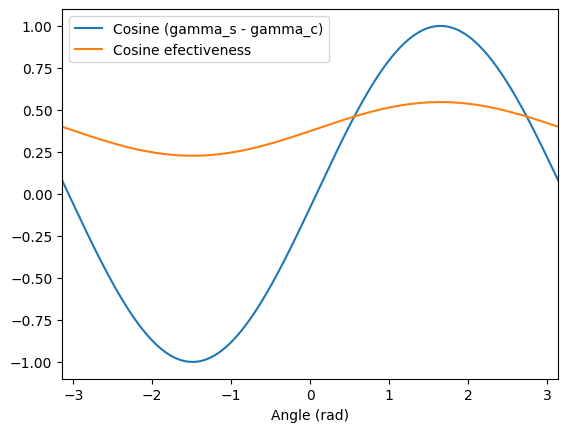

In [54]:
import matplotlib
import matplotlib.pyplot as plt

x = np.linspace(-np.pi, np.pi, num=300)

# Plot sin(x) and cos(x), and add label for each
plt.plot(x, np.cos(gamma_s-x), label="Cosine (gamma_s - gamma_c)")
plt.plot(x, incidence(x), label="Cosine efectiveness")

# Label the x-axis
plt.xlabel('Angle (rad)')

# Add legend
plt.legend()

# Use the start and end values in x as x limits
plt.xlim(x[0], x[-1])

plt.show()

### c) How much was the cosine effectiveness if the surface found is tilted 10 degrees (surface tilt angle) for the calculated surface azimuth angle? [%]

In [64]:
#Cosine effectiveness

beta_c = np.deg2rad(10)

theta = np.arccos(np.cos(beta_c)*np.cos(theta_z) + np.sin(beta_c)*np.sin(theta_z)*np.cos(gamma_s-gamma_c))

eta = np.cos(theta)

print("The cosine effectiveness is", round(eta*100, 4), "%")

The cosine effectiveness is 22.7412 %


### d) How much was the incident radiation on the bodies if the beam radiation was 700W/m2 and the diffuse radiation 250W/m2? [W/m2]

In [67]:
I_b = 700
I_d = 250

I_bc = I_b*np.cos(theta_z)

I_global = I_bc+I_d

print(f"Beam incident irradiation = {round(I_bc, 4)} W/m2")
print(f"Global incident irradiation = {round(I_global,4)} W/m2")

Beam incident irradiation = 275.1387 W/m2
Global incident irradiation = 525.1387 W/m2
